Step 4 : Exploring Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
mcdonalds = pd.read_csv('mcdonalds.csv')

In [6]:
mcdonalds.columns.tolist()

['yummy',
 'convenient',
 'spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty',
 'expensive',
 'healthy',
 'disgusting',
 'Like',
 'Age',
 'VisitFrequency',
 'Gender']

In [8]:
rows, columns = mcdonalds.shape

In [12]:
print(f'No.of rows : {rows} \nNo.of columns : {columns}')

No.of rows : 1453 
No.of columns : 15


In [13]:
mcdonalds.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [15]:
md_x = mcdonalds.iloc[:,:11].copy()

In [16]:
md_x.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No


In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
md_x['yummy'] = le.fit_transform(md_x['yummy'])
md_x['convenient'] = le.fit_transform(md_x['convenient'])
md_x['spicy'] = le.fit_transform(md_x['spicy'])
md_x['fattening'] = le.fit_transform(md_x['fattening'])
md_x['greasy'] = le.fit_transform(md_x['greasy'])
md_x['fast'] = le.fit_transform(md_x['fast'])
md_x['cheap'] = le.fit_transform(md_x['cheap'])
md_x['tasty'] = le.fit_transform(md_x['tasty'])
md_x['expensive'] = le.fit_transform(md_x['expensive'])
md_x['healthy'] = le.fit_transform(md_x['healthy'])
md_x['disgusting'] = le.fit_transform(md_x['disgusting'])

In [18]:
column_means = md_x.mean().round(2)
print(column_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [19]:
md_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   yummy       1453 non-null   int64
 1   convenient  1453 non-null   int64
 2   spicy       1453 non-null   int64
 3   fattening   1453 non-null   int64
 4   greasy      1453 non-null   int64
 5   fast        1453 non-null   int64
 6   cheap       1453 non-null   int64
 7   tasty       1453 non-null   int64
 8   expensive   1453 non-null   int64
 9   healthy     1453 non-null   int64
 10  disgusting  1453 non-null   int64
dtypes: int64(11)
memory usage: 125.0 KB


In [20]:
md_x.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,0.552650,0.907777,0.093599,0.867171,0.526497,0.900206,0.598761,0.644184,0.357880,0.198899,0.242946
std,0.497391,0.289440,0.291371,0.339506,0.499469,0.299828,0.490318,0.478925,0.479542,0.399309,0.429010
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


PCA

In [21]:
from sklearn.decomposition import PCA
pca = PCA()
md_pca = pca.fit_transform(md_x)


In [24]:
explained_variance = pca.explained_variance_ratio_
std_devs = np.sqrt(pca.explained_variance_)
print("Explained variance ratio:\n", explained_variance)
print("Cumulative explained variance:\n", np.cumsum(explained_variance))
print("Standard deviations:\n", np.round(std_devs, 1))

Explained variance ratio:
 [0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
Cumulative explained variance:
 [0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]
Standard deviations:
 [0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


In [25]:
rotation_matrix = pca.components_
print("Rotation (11 x 11):")
print(rotation_matrix)

Rotation (11 x 11):
[[-0.47693349 -0.15533159 -0.00635636  0.11623168  0.3044427  -0.10849325
  -0.33718593 -0.47151394  0.32904173 -0.21371062  0.37475293]
 [ 0.36378978  0.016414    0.01880869 -0.03409395 -0.06383884 -0.0869722
  -0.61063276  0.3073178   0.60128596  0.07659344 -0.13965633]
 [-0.30444402 -0.0625153  -0.03701866 -0.32235949 -0.80237317 -0.06464172
  -0.14931026 -0.28726479  0.02439661  0.19205128 -0.08857138]
 [ 0.0551622  -0.14242496  0.19761927 -0.35413876  0.2539601  -0.09736269
   0.11895823 -0.00254696  0.06781599  0.76348804  0.36953871]
 [-0.30753507  0.27760805  0.07062017 -0.07340475  0.36139895  0.10793025
  -0.12897259 -0.21089912 -0.00312457  0.28784553 -0.72920859]
 [ 0.17073819 -0.34783006 -0.3550866  -0.40651542  0.20934711 -0.59463206
  -0.10324067 -0.07691443 -0.26134151 -0.17822612 -0.21087805]
 [-0.28051863 -0.05973793  0.70763705 -0.38594277  0.03616962 -0.08684577
  -0.04044934  0.36045348 -0.06838452 -0.34961569 -0.02679159]
 [ 0.01304117 -0.11307

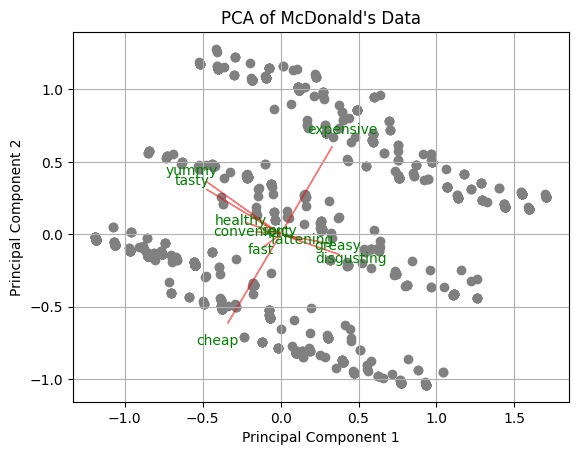

In [28]:
# Plot the PCA results
plt.scatter(md_pca[:, 0], md_pca[:, 1], color='grey')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of McDonald\'s Data')

# Project the axes
def plot_projection_axes(pca, components=(0, 1)):
    for i in range(pca.components_.shape[1]):
        plt.arrow(0, 0, pca.components_[components[0], i], pca.components_[components[1], i],
                  color='r', alpha=0.5)
        plt.text(pca.components_[components[0], i] * 1.2, pca.components_[components[1], i] * 1.2,
                 mcdonalds.columns[i], color='g', ha='center', va='center')

plot_projection_axes(pca, components=(0, 1))
plt.grid()
plt.show()

Step 5 : Extracting Segments

In [29]:
from sklearn.cluster import KMeans
from sklearn.utils import check_random_state
def kmeans_clustering(data, n_clusters, n_init, random_state=None):
    kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=random_state)
    kmeans.fit(data)
    return kmeans

In [31]:
random_state = check_random_state(1234)
kmeans_results = {}
for n_clusters in range(2, 9):
    kmeans = kmeans_clustering(md_x, n_clusters=n_clusters, n_init=10, random_state=random_state)
    kmeans_results[n_clusters] = kmeans


In [32]:
for n_clusters, kmeans in kmeans_results.items():
    print(f"Cluster centers for k={n_clusters}:\n{kmeans.cluster_centers_}\n")

Cluster centers for k=2:
[[0.87053571 0.97767857 0.10267857 0.8359375  0.43303571 0.93861607
  0.67075893 0.97098214 0.30022321 0.28125    0.06473214]
 [0.04129264 0.79533214 0.07899461 0.91741472 0.67684022 0.83842011
  0.48294434 0.11849192 0.45062837 0.06642729 0.52962298]]

Cluster centers for k=3:
[[0.84278768 0.98055105 0.08752026 0.80388979 0.36628849 0.96272285
  0.9286872  0.9643436  0.01620746 0.30470016 0.04051864]
 [0.01408451 0.78269618 0.07645875 0.9195171  0.66197183 0.84708249
  0.52716298 0.04627767 0.40442656 0.06237425 0.55331992]
 [0.81415929 0.95870206 0.12979351 0.90560472 0.61946903 0.86430678
  0.10324484 0.9380531  0.91150442 0.20648968 0.15634218]]

Cluster centers for k=4:
[[0.01912568 0.90710383 0.09016393 0.92076503 0.59562842 0.95628415
  0.91803279 0.28961749 0.02185792 0.07650273 0.32786885]
 [0.98050682 0.98245614 0.10331384 0.79532164 0.38791423 0.96101365
  0.9785575  0.98050682 0.04873294 0.37621832 0.06432749]
 [0.86746988 0.96385542 0.09638554 0.88

In [33]:
for n_clusters, kmeans in kmeans_results.items():
    print(f"Cluster labels for k={n_clusters}:\n{kmeans.labels_}\n")

Cluster labels for k=2:
[1 0 0 ... 0 0 1]

Cluster labels for k=3:
[1 2 2 ... 2 0 1]

Cluster labels for k=4:
[0 2 2 ... 2 1 3]

Cluster labels for k=5:
[3 2 2 ... 2 4 0]

Cluster labels for k=6:
[0 1 5 ... 5 3 2]

Cluster labels for k=7:
[4 3 0 ... 0 5 2]

Cluster labels for k=8:
[5 6 6 ... 3 7 4]



In [35]:
wcss = []
for n_clusters in range(2, 9):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=random_state)
    kmeans.fit(md_x)
    wcss.append(kmeans.inertia_)

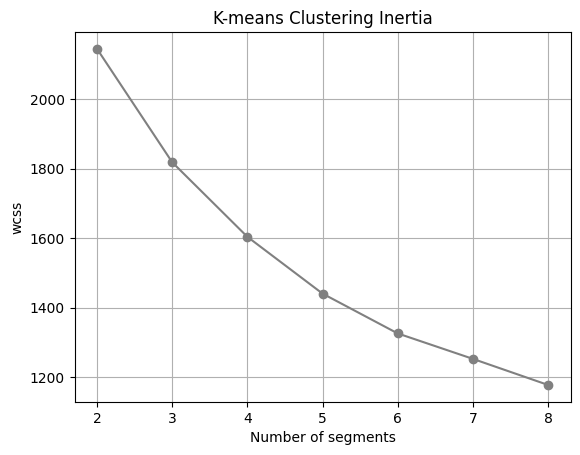

In [37]:
plt.plot(range(2, 9), wcss, marker='o', color='grey')
plt.xlabel('Number of segments')
plt.ylabel('wcss')
plt.title('K-means Clustering Inertia')
plt.grid(True)
plt.show()

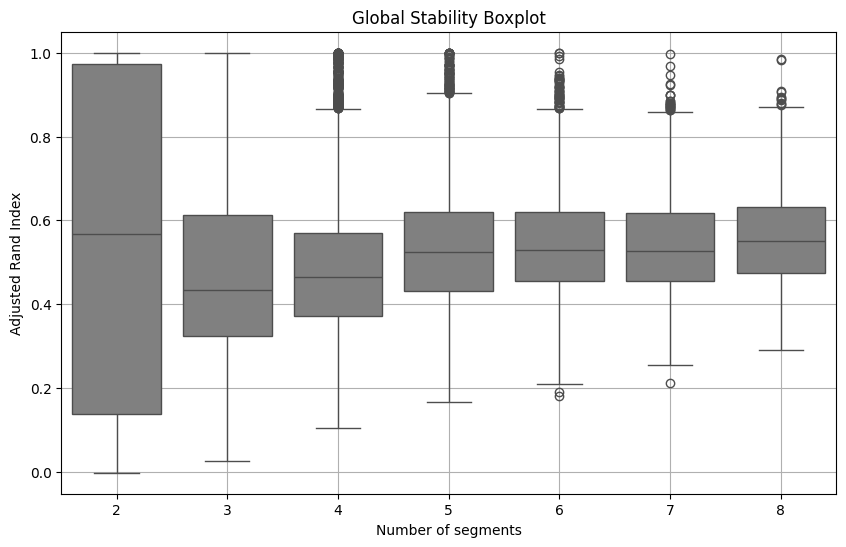

In [38]:
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample, check_random_state
def bootstrap_kmeans(data, n_clusters_range, n_rep=10, n_boot=100, random_state=None):
    results = {n_clusters: [] for n_clusters in n_clusters_range}

    for n_clusters in n_clusters_range:
        for _ in range(n_boot):
            boot_sample = resample(data, random_state=random_state)
            kmeans_models = []

            for _ in range(n_rep):
                kmeans = KMeans(n_clusters=n_clusters, n_init=1, random_state=random_state)
                kmeans.fit(boot_sample)
                kmeans_models.append(kmeans.labels_)

            # Calculate adjusted Rand index for each pair of k-means results
            for i in range(n_rep):
                for j in range(i + 1, n_rep):
                    ari = adjusted_rand_score(kmeans_models[i], kmeans_models[j])
                    results[n_clusters].append(ari)

    return results

# Define the range of clusters and bootstrap parameters
n_clusters_range = range(2, 9)
n_rep = 10
n_boot = 100

# Perform bootstrapping
bootstrap_results = bootstrap_kmeans(md_x, n_clusters_range, n_rep=n_rep, n_boot=n_boot, random_state=random_state)

# Convert the results to a dataframe for easier plotting
import seaborn as sns
bootstrap_results_df = pd.DataFrame([
    {"Number of segments": n_clusters, "Adjusted Rand Index": ari}
    for n_clusters, aris in bootstrap_results.items()
    for ari in aris
])

# Plot the global stability boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x="Number of segments", y="Adjusted Rand Index", data=bootstrap_results_df, color='grey')
plt.xlabel('Number of segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Global Stability Boxplot')
plt.grid(True)
plt.show()


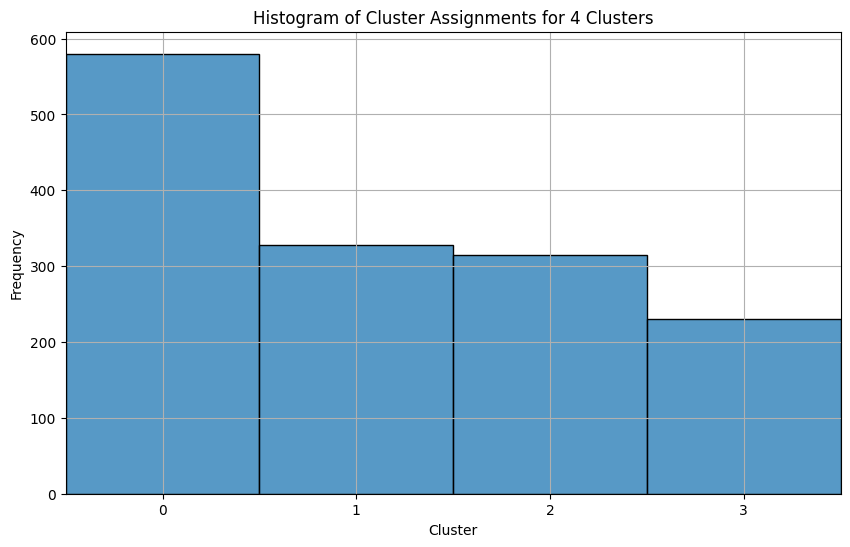

In [40]:
kmeans_4 = KMeans(n_clusters=4, n_init=10, random_state=random_state)
kmeans_4.fit(md_x)
cluster_assignments_4 = kmeans_4.labels_

# Plot the histogram of the cluster assignments
plt.figure(figsize=(10, 6))
sns.histplot(cluster_assignments_4, bins=np.arange(5) - 0.5, kde=False)
plt.xlim(-0.5, 3.5)
plt.xticks(range(4))
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Histogram of Cluster Assignments for 4 Clusters')
plt.grid(True)
plt.show()

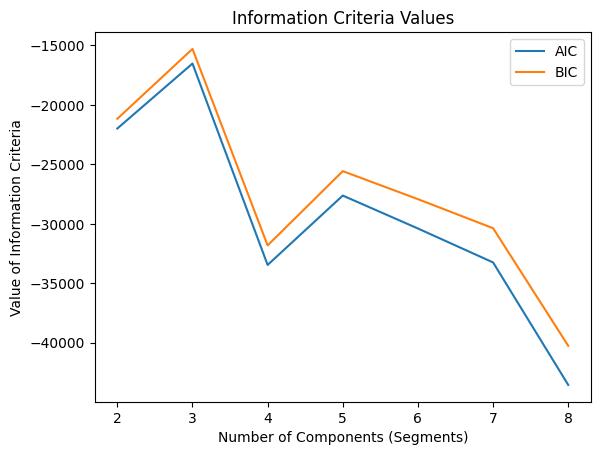

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cross-tabulation (k-means vs mixture model):
[[ 20 302   0 191]
 [  2 116  59 189]
 [ 90  30  14 108]
 [ 17 150   1 164]]


In [52]:
from sklearn.mixture import GaussianMixture

# Assuming MD.x is your data

# Step 1: Fit mixture models with different numbers of components
models = []
for k in range(2, 9):
    model = GaussianMixture(n_components=k, random_state=1234)
    model.fit(md_x)
    models.append(model)

# Step 2: Plot information criteria (AIC, BIC)
import matplotlib.pyplot as plt

# Extract AIC and BIC values
aic_values = [model.aic(md_x) for model in models]
bic_values = [model.bic(md_x) for model in models]

# Plotting
plt.plot(range(2, 9), aic_values, label='AIC')
plt.plot(range(2, 9), bic_values, label='BIC')
plt.xlabel('Number of Components (Segments)')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria Values')
plt.legend()
plt.show()

# Step 3: Choose the number of components (segments) based on the information criteria plot
# In this example, let's say we choose 4 components

# Step 4: Extract the model with 4 components
best_model_index = 2  # Index 2 corresponds to 4 components
best_model = models[best_model_index]

# Step 5: Perform k-means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=1234).fit(md_x)

# Step 6: Compare k-means clusters with mixture model clusters using a cross-tabulation
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(kmeans.labels_, best_model.predict(md_x))
print("Cross-tabulation (k-means vs mixture model):")
print(conf_matrix)


In [53]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

# Assuming you have already performed k-means clustering and stored the labels in kmeans.labels_

# Fit a Gaussian Mixture Model using the k-means cluster labels
# This assumes you have already fit k-means on your data and stored the labels
md_m4a = GaussianMixture(n_components=4, random_state=1234)
md_m4a.fit(md_x)

# Predict cluster labels using the Gaussian Mixture Model
mixture_labels = md_m4a.predict(md_x)

# Compare k-means clusters with mixture model clusters using a cross-tabulation
conf_matrix = confusion_matrix(kmeans.labels_, mixture_labels)
print("Cross-tabulation (k-means vs mixture model):")
print(conf_matrix)


Cross-tabulation (k-means vs mixture model):
[[ 20 302   0 191]
 [  2 116  59 189]
 [ 90  30  14 108]
 [ 17 150   1 164]]


In [58]:
import pandas as pd

# Reverse the frequency table for the 'Like' variable
like_counts = mcdonalds['Like'].value_counts().sort_index(ascending=False)
reversed_like_counts = like_counts[::-1]

# Ensure 'Like' column is numeric
mcdonalds['Like'] = pd.to_numeric(mcdonalds['Like'], errors='coerce')

# Create a mapping dictionary to reverse the 'Like' values
like_mapping = dict(zip(reversed_like_counts.index, 6 - reversed_like_counts.index))

# Map the reversed 'Like' values to create the 'Like.n' variable
mcdonalds['Like.n'] = mcdonalds['Like'].map(like_mapping)

# Display the frequency table for the new variable 'Like.n'
like_n_counts = mcdonalds['Like.n'].value_counts().sort_index()
print(like_n_counts)

# Create the formula for the regression model
variables = mcdonalds.columns[1:12]  # Assuming the first column is the target variable
formula = 'Like.n ~ ' + ' + '.join(variables)

# Display the formula
print("Regression formula:", formula)


Like.n
2.0     160
3.0     229
4.0     187
5.0     152
6.0     169
7.0      58
8.0      59
9.0      73
10.0     71
Name: count, dtype: int64
Regression formula: Like.n ~ convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting + Like


In [121]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
mcdonalds['convenient'] = le.fit_transform(mcdonalds['convenient'])
mcdonalds['yummy'] = le.fit_transform(mcdonalds['yummy'])
mcdonalds['spicy'] = le.fit_transform(mcdonalds['spicy'])
mcdonalds['fattening'] = le.fit_transform(mcdonalds['fattening'])
mcdonalds['greasy'] = le.fit_transform(mcdonalds['greasy'])
mcdonalds['fast'] = le.fit_transform(mcdonalds['fast'])
mcdonalds['cheap'] = le.fit_transform(mcdonalds['cheap'])
mcdonalds['tasty'] = le.fit_transform(mcdonalds['tasty'])
mcdonalds['expensive'] = le.fit_transform(mcdonalds['expensive'])
mcdonalds['healthy'] = le.fit_transform(mcdonalds['healthy'])
mcdonalds['disgusting'] = le.fit_transform(mcdonalds['disgusting'])
mcdonalds['VisitFrequency'] = le.fit_transform(mcdonalds['VisitFrequency'])
mcdonalds['Gender'] = le.fit_transform(mcdonalds['Gender'])

In [123]:
mcdonalds['Gender'].value_counts()

Gender
0    788
1    665
Name: count, dtype: int64

In [124]:
mcdonalds.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Like.n,k4,k4_binary
0,0,1,0,1,0,1,1,0,1,0,0,-3.0,61,0,0,9.0,0,0
1,1,1,0,1,1,1,1,1,1,0,0,2.0,51,0,0,4.0,0,0
2,0,1,1,1,1,1,0,1,1,1,0,1.0,62,0,0,5.0,1,0
3,1,1,0,1,1,1,1,1,0,0,1,4.0,69,4,0,2.0,0,0
4,0,1,0,1,1,1,1,0,0,1,0,2.0,49,3,1,4.0,1,0


In [78]:
import pandas as pd
from sklearn.impute import SimpleImputer
import statsmodels.api as sm

# Assuming mcdonalds is your DataFrame
# Convert 'Like' column to numeric values, coercing errors to NaN
mcdonalds['Like'] = pd.to_numeric(mcdonalds['Like'], errors='coerce')

# Subtract the numeric 'Like' values from 6 to create a new variable 'Like.n'
mcdonalds['Like.n'] = 6 - mcdonalds['Like']

# Display the frequency table for the new variable 'Like.n'
print(mcdonalds['Like.n'].value_counts())

# Define the list of variables for the regression model
variables = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast',
             'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
mcdonalds_imputed = pd.DataFrame(imputer.fit_transform(mcdonalds[variables]), columns=variables)

# Define the regression formula with the 'Like.n' suffix
formula = 'Like.n ~ ' + ' + '.join(variables)




Like.n
3.0     229
4.0     187
6.0     169
2.0     160
5.0     152
9.0      73
10.0     71
8.0      59
7.0      58
Name: count, dtype: int64


In [80]:
from scipy.stats import norm

# Refit the Gaussian Mixture Model (GMM)

gmm_refit = gmm.fit(mcdonalds_imputed)

# Extract the summary statistics for each component
summary_stats = {}
for i in range(gmm_refit.n_components):
    component_summary = {}
    component_summary['Intercept'] = gmm_refit.means_[i][0]
    component_summary['Std. Error'] = gmm_refit.covariances_[i][0][0] ** 0.5
    component_summary['z value'] = component_summary['Intercept'] / component_summary['Std. Error']
    component_summary['Pr(>|z|)'] = 2 * (1 - norm.cdf(abs(component_summary['z value'])))
    summary_stats[f'Comp.{i+1}'] = component_summary

# Print the summary statistics
for component, stats in summary_stats.items():
    print(component)
    print("(Intercept)")
    print(f"Estimate: {stats['Intercept']}")
    print(f"Std. Error: {stats['Std. Error']}")
    print(f"z value: {stats['z value']}")
    print(f"Pr(>|z|): {stats['Pr(>|z|)']}")
    print()


Comp.1
(Intercept)
Estimate: 0.27991453005327116
Std. Error: 0.44895811154085113
z value: 0.6234758273830664
Pr(>|z|): 0.5329718822552205

Comp.2
(Intercept)
Estimate: 0.6822335025430255
Std. Error: 0.46560922515657166
z value: 1.465249109515837
Pr(>|z|): 0.14285296543377735



Step 6 : Profiling Segments

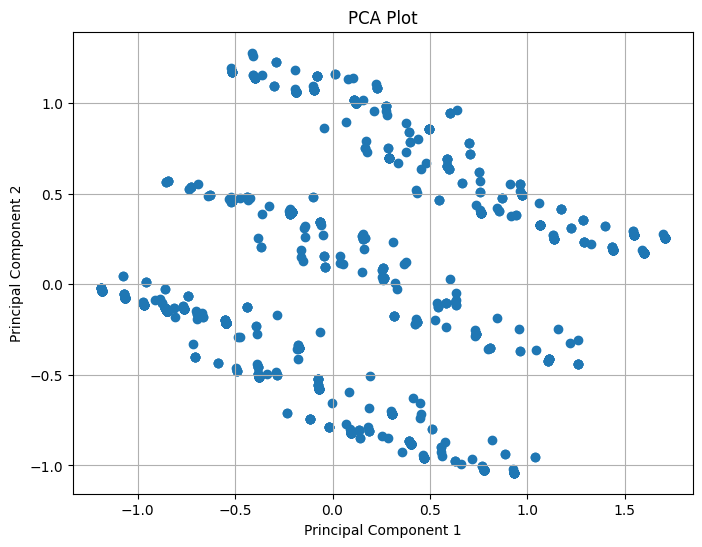

In [84]:
from sklearn.decomposition import PCA

# Assuming MD_x is your data
pca = PCA(n_components=2)
MD_pca = pca.fit_transform(md_x)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(md_pca[:, 0], md_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot')
plt.grid(True)
plt.show()


ERROR: Could not find a version that satisfies the requirement partykit (from versions: none)
ERROR: No matching distribution found for partykit


<Figure size 800x600 with 0 Axes>

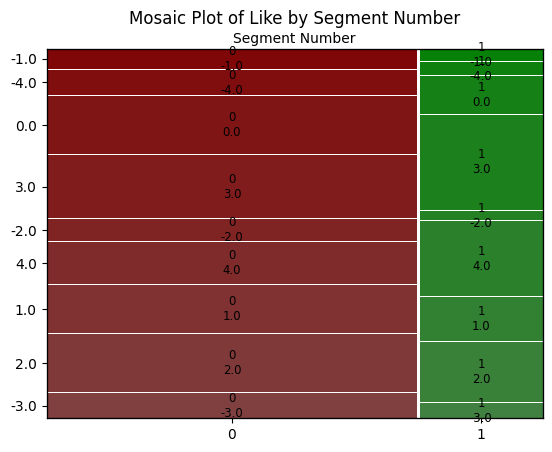

<Figure size 800x600 with 0 Axes>

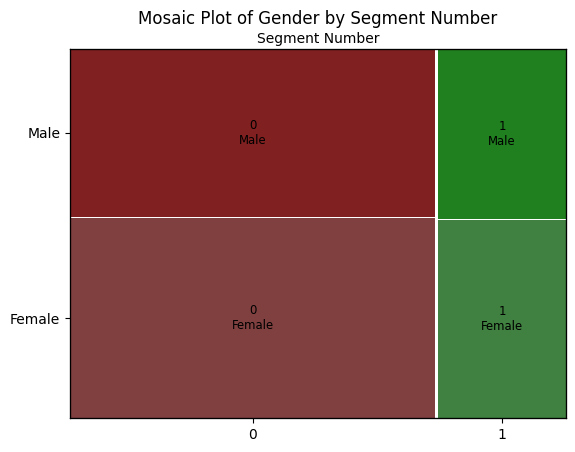

ModuleNotFoundError: No module named 'partykit'

In [88]:
!pip install partykit
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# Assuming 'k4' contains the cluster labels
mcdonalds['k4'] = cluster_labels  # Assign the cluster labels to the DataFrame

# Now you can proceed with the mosaic plot
plt.figure(figsize=(8, 6))
mosaic(mcdonalds, ['k4', 'Like'])
plt.xlabel('Segment Number')
plt.ylabel('Like')
plt.title('Mosaic Plot of Like by Segment Number')
plt.show()


# Mosaic plot for Gender and segment number
plt.figure(figsize=(8, 6))
mosaic(mcdonalds, ['k4', 'Gender'])
plt.xlabel('Segment Number')
plt.ylabel('Gender')
plt.title('Mosaic Plot of Gender by Segment Number')
plt.show()

# Decision tree using partykit
from partykit import ctree

# Convert k4 to a binary factor indicating whether it's segment 3 or not
mcdonalds['k4_3'] = mcdonalds['k4'] == 3

# Define the features and target
features = ['Like.n', 'Age', 'VisitFrequency', 'Gender']
target = 'k4_3'

# Fit the conditional inference tree
tree = ctree.CTree.from_formula(target + ' ~ ' + ' + '.join(features), data=mcdonalds)

# Plot the tree
plt.figure(figsize=(12, 8))
tree.plot()
plt.title('Conditional Inference Tree')
plt.show()


<Axes: >

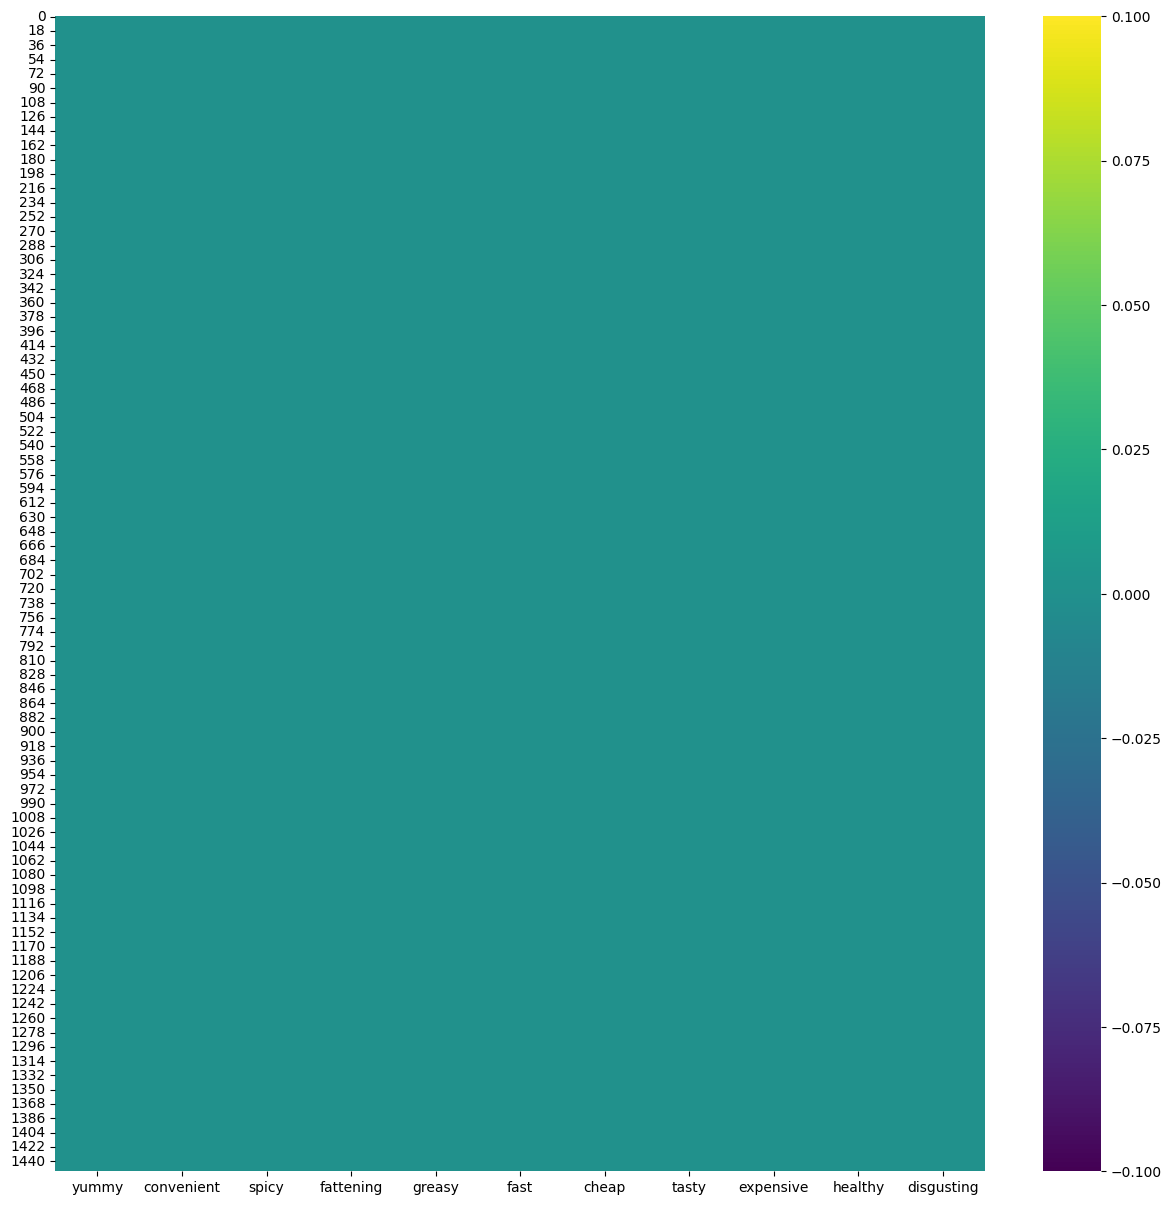

In [105]:
plt.figure(figsize = (15,15))
sns.heatmap(md_x.isnull(), cmap = 'viridis')

<Axes: >

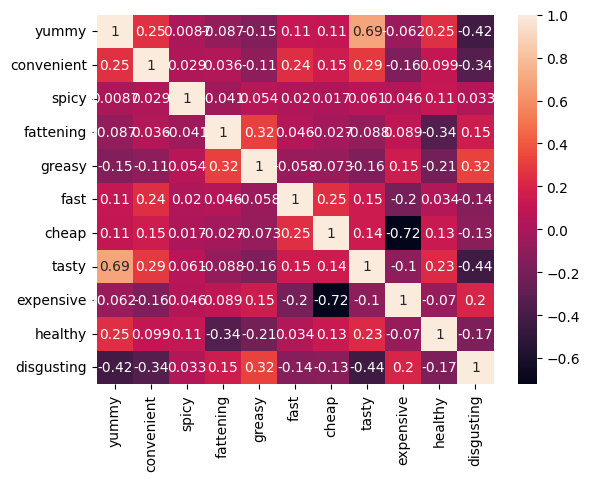

In [100]:
md_corr = md_x.corr()
sns.heatmap(md_corr, annot = True)

In [107]:
mcdonalds_encoded.isnull().sum()

yummy                                     0
convenient                                0
spicy                                     0
fattening                                 0
greasy                                    0
fast                                      0
cheap                                     0
tasty                                     0
expensive                                 0
healthy                                   0
disgusting                                0
Like                                    295
Age                                       0
Like.n                                  295
k4                                        0
k4_binary                                 0
VisitFrequency_Every three months         0
VisitFrequency_More than once a week      0
VisitFrequency_Never                      0
VisitFrequency_Once a month               0
VisitFrequency_Once a week                0
VisitFrequency_Once a year                0
Gender_Female                   

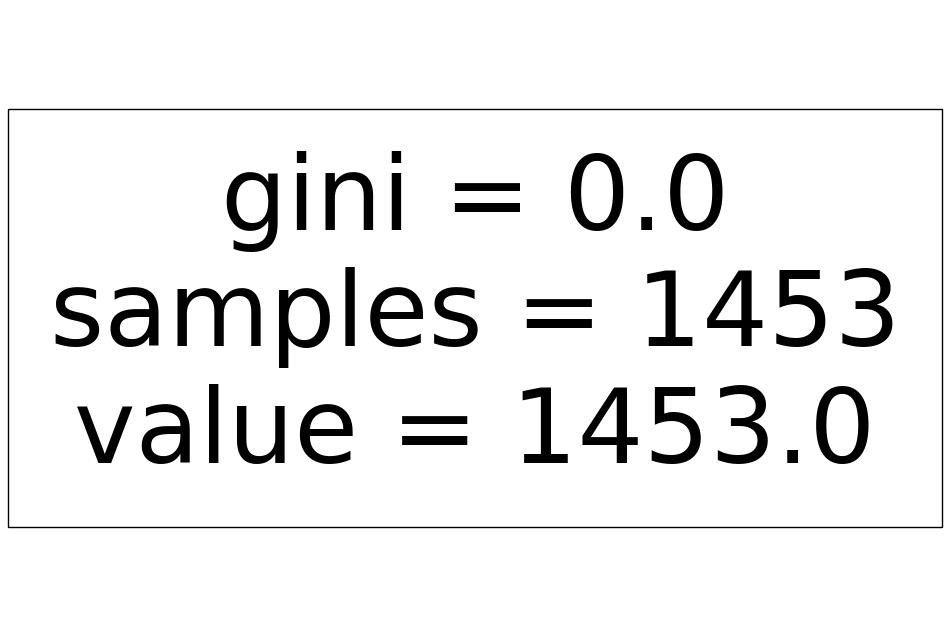

In [116]:
from sklearn.preprocessing import OneHotEncoder

# Convert categorical variables into one-hot encoded format
mcdonalds_encoded = pd.get_dummies(mcdonalds, columns=['VisitFrequency', 'Gender'])

# Define the features and target variable
X = mcdonalds_encoded.drop(columns = ['k4_binary','Like','Like.n'], axis =1)
y = mcdonalds_encoded['k4_binary']

# Create and train the decision tree classifier
tree = DecisionTreeClassifier()
tree.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=X.columns, class_names=['Not Segment 3', 'Segment 3'], filled=True)
plt.show()


In [112]:
X.isnull().sum()

yummy                                     0
convenient                                0
spicy                                     0
fattening                                 0
greasy                                    0
fast                                      0
cheap                                     0
tasty                                     0
expensive                                 0
healthy                                   0
disgusting                                0
Like                                    295
Age                                       0
Like.n                                  295
k4                                        0
VisitFrequency_Every three months         0
VisitFrequency_More than once a week      0
VisitFrequency_Never                      0
VisitFrequency_Once a month               0
VisitFrequency_Once a week                0
VisitFrequency_Once a year                0
Gender_Female                             0
Gender_Male                     

Step 8 : Selecting the Target Elements

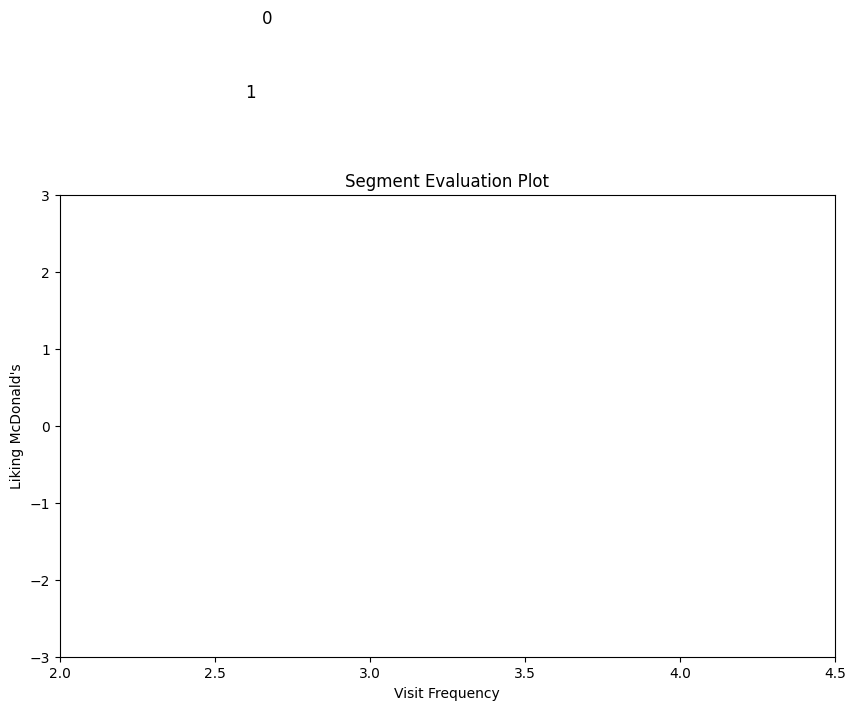

In [128]:
k4 = mcdonalds['k4']

# Compute mean values for VisitFrequency, Like.n, and Gender
visit = mcdonalds.groupby(k4)['VisitFrequency'].mean()
like = mcdonalds.groupby(k4)['Like.n'].mean()
female = mcdonalds.groupby(k4)['Gender'].apply(lambda x: np.mean(x == 'Female'))

# Create the segment evaluation plot
plt.figure(figsize=(10, 6))

# Plot 'visit' vs 'like', with point size proportional to the percentage of females
plt.scatter(visit, like, s=100 * female, alpha=0.5)
plt.xlim(2, 4.5)
plt.ylim(-3, 3)

# Add text labels for each segment
for i, txt in enumerate(visit.index):
    plt.text(visit[txt], like[txt], str(txt), fontsize=12)

plt.xlabel('Visit Frequency')
plt.ylabel('Liking McDonald\'s')
plt.title('Segment Evaluation Plot')

plt.show()